***Importing all packages/libraries and datasets***

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from concurrent.futures import ThreadPoolExecutor
import random
from sklearn.preprocessing import OneHotEncoder
fd_14 = pd.read_csv("./Stocks/2014_Financial_Data.csv")
fd_15 = pd.read_csv("./Stocks/2015_Financial_Data.csv")
fd_16 = pd.read_csv("./Stocks/2016_Financial_Data.csv")
fd_17 = pd.read_csv("./Stocks/2017_Financial_Data.csv")
fd_18 = pd.read_csv("./Stocks/2018_Financial_Data.csv")

In [58]:
# print(fd_14.head())
# print(fd_15.head())
# print(fd_16.head())
# print(fd_17.head())
# print(fd_18.head())
fd_14.append(fd_15, ignore_index=True)
fd_14.append(fd_16, ignore_index=True)
fd_14.append(fd_17, ignore_index=True)
fd_14.append(fd_18, ignore_index=True)
fd_14.info()
fd_14.describe()
# print(fd_14[["Unnamed: 0", "Asset Growth", "2015 PRICE VAR [%]", "Class"]])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808 entries, 0 to 3807
Columns: 225 entries, Unnamed: 0 to Class
dtypes: float64(222), int64(1), object(2)
memory usage: 6.5+ MB


,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2015 PRICE VAR [%],Class
count,3.764000e+03,3572.000000,3.734000e+03,3.756000e+03,3.672000e+03,3.749000e+03,3.745000e+03,3.753000e+03,3.745000e+03,3.728000e+03,...,3208.000000,3518.000000,3518.000000,3518.000000,3439.000000,3506.000000,3561.000000,3565.000000,3.808000e+03,3808.000000
mean,5.879050e+09,12.954244,3.700973e+09,2.188214e+09,9.401830e+07,9.307406e+08,1.438144e+09,6.748248e+08,1.002018e+08,5.725866e+08,...,0.036206,4.445793,0.164692,2.279999,0.813931,1.361780,0.596529,0.382284,9.751560e+02,0.429097
std,3.901741e+10,705.605473,3.040688e+10,1.159028e+10,6.408912e+08,4.820928e+09,7.305171e+09,3.786291e+09,6.991091e+08,2.793740e+09,...,0.259765,161.135098,2.195115,92.428920,25.630214,18.734301,25.894049,4.696975,4.098461e+04,0.495012
min,-6.276160e+08,-1.773200,-5.455740e+08,-1.105000e+09,-1.500000e+05,0.000000e+00,-1.088448e+09,-6.786000e+09,-2.250000e+08,-8.878000e+09,...,-1.000000,-1.000000,-1.000000,-0.979600,-230.000000,-1.051000,-1.043700,-1.000000,-1.003972e+02,0.000000
25%,5.788880e+07,-0.002350,3.135714e+06,3.092900e+07,0.000000e+00,1.548900e+07,3.106600e+07,-1.308000e+06,0.000000e+00,-3.732902e+06,...,0.000000,-0.045800,0.000000,-0.015400,-0.084550,-0.048200,0.000000,-0.003900,-2.857143e+01,0.000000
50%,4.349010e+08,0.061850,1.414420e+08,1.908760e+08,0.000000e+00,7.381800e+07,1.386610e+08,4.104400e+07,2.563000e+06,2.842700e+07,...,0.000000,0.014250,0.000000,0.062200,0.037100,0.000000,0.000000,0.068800,-5.281842e+00,0.000000
75%,2.393625e+09,0.188875,1.199844e+09,8.922534e+08,9.911000e+06,3.510000e+08,5.885100e+08,2.712980e+08,4.300000e+07,2.193835e+08,...,0.044000,0.205475,0.063850,0.217100,0.141900,0.210300,0.004700,0.220500,1.331484e+01,1.000000
max,1.824698e+12,42138.663900,1.537249e+12,4.621600e+11,1.153700e+10,1.856830e+11,3.056050e+11,1.565540e+11,3.152300e+10,8.720500e+10,...,3.605800,9328.200000,76.625000,5468.426400,1360.125000,729.576600,1542.611000,225.690000,2.418601e+06,1.000000


In [59]:
object_cols = list(filter(lambda x: isinstance(fd_14[x][0], str), fd_14.columns))
object_cols

['Unnamed: 0', 'Sector']

['Consumer Defensive' 'Basic Materials' 'Healthcare' 'Consumer Cyclical'
 'Industrials' 'Real Estate' 'Communication Services' 'Energy'
 'Financial Services' 'Utilities' 'Technology']
0    2174
1    1634
Name: Class, dtype: int64


c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


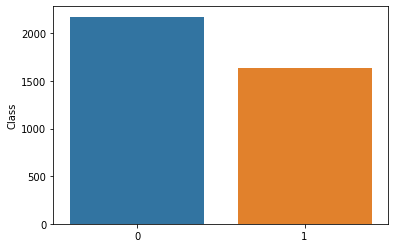

In [60]:
print(fd_14['Sector'].unique())

df_class = fd_14['Class'].value_counts()
print(df_class)
sns.barplot(np.arange(len(df_class)), df_class)
plt.show()

***Attempting to clean data***

In [61]:
# Dropped those columns with more than 50% of their elements as NULL
fd_14 = fd_14.dropna(thresh=len(fd_14)/2, axis=1)
print(fd_14.head())
print(fd_14.shape)

  Unnamed: 0       Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0         PG  7.440100e+10         -0.0713     3.903000e+10  3.537100e+10   
1       VIPS  3.734148e+09          1.1737     2.805625e+09  9.285226e+08   
2         KR  9.837500e+10          0.0182     7.813800e+10  2.023700e+10   
3        RAD  2.552641e+10          0.0053     1.820268e+10  7.323734e+09   
4        GIS  1.790960e+10          0.0076     1.153980e+10  6.369800e+09   

   R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
0  0.000000e+00  2.146100e+10        2.146100e+10      1.391000e+10   
1  1.083303e+08  3.441414e+08        7.939267e+08      1.345959e+08   
2  0.000000e+00  1.519600e+10        1.751200e+10      2.725000e+09   
3  0.000000e+00  6.561162e+09        6.586482e+09      7.372520e+08   
4  0.000000e+00  3.474300e+09        3.412400e+09      2.957400e+09   

   Interest Expense  ...  Receivables growth  Inventory Growth  Asset Growth  \
0      7.090000e+08  ...      

In [62]:

fd_14.isnull().sum()

Unnamed: 0                0
Revenue                  44
Revenue Growth          236
Cost of Revenue          74
Gross Profit             52
                       ... 
R&D Expense Growth      247
SG&A Expenses Growth    243
Sector                    0
2015 PRICE VAR [%]        0
Class                     0
Length: 222, dtype: int64

In [63]:
print(fd_14.columns)

Index(['Unnamed: 0', 'Revenue', 'Revenue Growth', 'Cost of Revenue',
       'Gross Profit', 'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense',
       ...
       'Receivables growth', 'Inventory Growth', 'Asset Growth',
       'Book Value per Share Growth', 'Debt Growth', 'R&D Expense Growth',
       'SG&A Expenses Growth', 'Sector', '2015 PRICE VAR [%]', 'Class'],
      dtype='object', length=222)


In [64]:
# Test to see how many rows will be left if all NULL valued rows were removed
fd_14 = fd_14.dropna()
fd_14.drop(['Unnamed: 0', 'Sector'], axis=1, inplace=True)
fd_14.to_csv('out.csv')

In [65]:
def is_cont(col):
    if type(col) != np.int64:
        if type(col) == np.float64:
            return True
        if len(col) > 0 and type(col.iloc[0]) == np.float64:
            return True
    counts = col.value_counts()
    if (len(counts[counts < .1 * len(counts)])) > 0:
        return True
    return False

In [66]:
def min_max_finder(data):
    max_col = dict()
    min_col = dict()
    for x in data.columns:
        max_col[x] = max(data[x])
        min_col[x] = min(data[x])
    return max_col, min_col

In [67]:
def normalize(df, max_cols, min_cols, conts):
    def normal_func(x, col):
        if max_cols[col] - min_cols[col] == 0:
            return 0
        return 2 * (x - min_cols[col]) / (max_cols[col] - min_cols[col]) - 1
    for col in df.columns:
        if conts[col]:
            df[col] = df[col].apply(
                lambda x: normal_func(x, col))

In [68]:
def convert_to_one_hot(col):
    encoder = OneHotEncoder(handle_unknown='ignore')
    col = col.reshape(-1, 1)
    encoder.fit(col)
    new_col = encoder.transform(col).toarray()
    return new_col

In [69]:
def extract_dataframe(filename, delim=None, names=None):
    df = pd.read_csv(filename, delimiter=delim, names=names)
    class_name = [x for x in df.columns if 'class' in x.lower()][0]
    df.rename(columns={class_name: 'class'}, inplace=True)
    num_vals = dict()
    for x in df:
        num_vals[x] = np.array(sorted(df[x].unique()))

    return df, num_vals



In [70]:
def make_X_y_split(df):
    X = df.loc[:, df.columns != 'class']
    y = df['class']
    X = np.array(X)
    y = np.array([y])
    y = convert_to_one_hot(y)
    return X, y

In [71]:
def create_thetas(layers: list):
    thetas = dict()
    for i, v in enumerate(layers[:-1]):
        val = np.random.uniform(-1, 1, size=(layers[i+1], v+1))
        thetas[i] = val
    return thetas


In [72]:
def add_bias(X):
    o = np.ones((np.shape(X)[0], 1), dtype=int)
    return np.column_stack((o, X))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def z(weights: np.array, inputs: np.array):
    return np.matmul(weights, inputs)

In [73]:
def run_forward_prop(X, theta):
    a = []
    a.append(np.asarray(add_bias(X)))
    for l in range(len(theta) - 1):
        # print(a[l])
        zl = np.matmul(a[l], theta[l].transpose())
        zl = sigmoid(zl)
        a.append(add_bias(zl))
    zl = np.matmul(a[len(theta)-1], theta[len(theta)-1].transpose())
    a.append(sigmoid(zl))
    return a

In [74]:
def J(outputs, y, reg=0, lamb=0.0):
    tempRes1 = []
    tempRes2 = []
    with np.errstate(divide="ignore"):
        tempRes1 = np.log(outputs)
        tempRes2 = np.log(1-outputs)
    tempRes1[np.isneginf(tempRes1)] = 0
    tempRes2[np.isneginf(tempRes2)] = 0
    jx = np.multiply(-1 * y, tempRes1)
    jy = np.multiply(1 - y, tempRes2)
    j = jx - jy
    j = np.sum(j) / len(y)
    return np.mean(j) + (reg if lamb != 0 else 0)

In [75]:
def run_back_prop(a, y, thetas, lamb):
    delta = dict()
    delta[len(thetas)] = np.subtract(a[-1], y)
    for k in range(len(thetas)-1, -1, -1):
        delta[k] = np.matmul(delta[k+1], thetas[k])
        delta[k] = np.multiply(delta[k], a[k])
        delta[k] = np.multiply(delta[k], 1 - a[k])
        delta[k] = np.delete(delta[k], (0), axis=1)
    D = dict()
    for k in range(len(thetas) - 1, -1, -1):
        if k not in D:
            D[k] = 0
        D[k] += np.matmul(delta[k+1].transpose(), a[k])
    for k in range(len(thetas)-1, -1, -1):
        if lamb != 0.0:
            Pk = lamb * thetas[k]
            Pk[:, 0] = np.array([0] * len(Pk[:, 0]))
            D[k] = (D[k] + Pk)
        D[k] /= len(y)
    return D

In [76]:
def calc_regularization(thetas, y, lamb=0):
    S = 0
    if lamb != 0:
        for a in thetas.values():
            for b in a:
                S += sum(b[1:]**2)
        S = lamb * S / 2 / len(y)
    return S

In [77]:
def gradient_descent(X, y, thetas, stop_crit, alpha, lamb):
    a = run_forward_prop(X, thetas)
    cur_cost = 100000
    reg = calc_regularization(thetas, y, lamb)
    new_c = J(a[-1], y, reg, lamb)
    num_iter = 0
    while (cur_cost - new_c > stop_crit and num_iter < 200000):
        cur_cost = new_c
        gradients = run_back_prop(a, y, thetas, lamb)
        for k in range(len(thetas)-1, -1, -1):
            thetas[k] -= alpha * gradients[k]
        num_iter += 1
        a = run_forward_prop(X, thetas)
        new_c = J(a[-1], y, reg, lamb)
        if num_iter % 10000 == 0:
            print(f"After {num_iter} iterations: {cur_cost - new_c}")
    print("Final Diff Cost:", cur_cost - new_c)
    print("Final Cost", new_c)
    print("Number of Iterations:", num_iter)
    return thetas

In [78]:
def train_test_split(all_indices: dict, foldNum: int):
    train = []
    test = []
    for c in all_indices:
        test.extend(all_indices[c][foldNum])
        t = np.concatenate(
            all_indices[c][0:foldNum]+all_indices[c][foldNum+1:]).ravel()
        train.extend(t)
    return train, test

In [79]:
def make_subsets(df, classes, num_splits: int):
    all = dict()
    for c in classes:
        all[c] = df.index[df['class'] == c].tolist()
        random.shuffle(all[c])
        all[c] = np.array_split(all[c], num_splits)
    return all

def convert_to_class(output):
    output = np.array(
        list((map(lambda x: np.where(x - max(x) >= 0, 1, 0), output))))
    return output

In [80]:
def calc_accuracy(actual, predicted):
    # key = 'actual,predicted', value = frequency
    outputs = Counter({'0,0': 0, '0,1': 0, '1:0': 0, '1,1': 0})
    total = 0
    for i in range(len(actual)):
        trueIndex = int(np.where(actual[i] == 1)[0])
        predIndex = int(np.where(predicted[i] == 1)[0])
        if trueIndex == predIndex:
            total += 1
        outputs += Counter([f"{trueIndex},{predIndex}"])
    return outputs, total/len(actual)

def F1_score(precision, recall):
    return 2 * precision * recall / (precision + recall)

def precision(all, num_vals):
    fin_len = len(num_vals) - 1 if len(num_vals) == 2 else len(num_vals)
    num_vals = num_vals[:-1] if len(num_vals) == 2 else num_vals
    num_vals = num_vals - min(num_vals) if min(num_vals) > 0 else num_vals
    precisions = 0
    for i in num_vals:
        TP = all[f"{i},{i}"]
        FP = sum([val for x, val in all.items()
                  if f",{i}" in x and f"{i},{i}" not in x])
        precisions += TP/(TP + FP) if TP+FP != 0 else 0
    return precisions / fin_len

def recall(all, num_vals):
    fin_len = len(num_vals) - 1 if len(num_vals) == 2 else len(num_vals)
    num_vals = num_vals[:-1] if len(num_vals) == 2 else num_vals
    num_vals = num_vals - min(num_vals) if min(num_vals) > 0 else num_vals
    recalls = 0
    for i in num_vals:
        TP = all[f"{i},{i}"]
        FN = sum([val for x, val in all.items()
                  if f"{i}," in x and f"{i},{i}" not in x])
        recalls += TP/(TP + FN) if TP + FN != 0 else 0
    return recalls / fin_len

In [81]:
def plots(x_axis, y_axis, y_lab, x_lab):
    plt.figure(figsize=(10, 6))
    plt.scatter(x_axis, y_axis, label=y_lab)
    plt.errorbar(x_axis, y_axis)
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.title(f"{y_lab} vs {x_lab}")
    plt.legend()
    plt.autoscale()
    plt.show()

In [82]:
def run_cross_valid(df, num_vals, alpha, net, conts, lamb=0, k=10, find_cost=0):
    num = np.ceil(len(df['class']) / k)
    all_indices = make_subsets(df, num_vals['class'], k)
    print(f"Number of instances in test set: {num}")
    test_accuracies = []
    all_fScore = []
    layers = [len(df.columns) - 1]
    layers.extend(net)
    layers.append(len(num_vals['class']))
    thetas = create_thetas(layers)
    # print(all_indices)
    # return
    for i in range(k):
        print(
            f"-----Iteration {i+1}  Net {net} Lambda {lamb} -----------------")
        train, test = train_test_split(all_indices, i)
        # print("TRAIN", train)
        # print("TEST", test)
        train = df.iloc[train]
        test = df.iloc[test]
        if (len(test) == 0):
            break
        # test.reset_index(drop=True, inplace=True)

        max_cols, min_cols = min_max_finder(train)
        normalize(train, max_cols, min_cols, conts)
        normalize(test, max_cols, min_cols, conts)
        trainX, trainY = make_X_y_split(train)
        testX, testY = make_X_y_split(test)

        thetas = gradient_descent(trainX, trainY, thetas, SC, alpha, lamb)
        results = run_forward_prop(testX, thetas)[-1]
        results = convert_to_class(results)
        if find_cost == 0:
            op, ac = calc_accuracy(testY, results)

            print("Conf Matrix:", op)
            print("Accuracy:", ac)

            # f1 = F1_score(precision(op, num_vals['class']), recall(
            #     op, num_vals['class']))
            # print("F1-Score:", f1)
            # all_fScore.append(f1)
            test_accuracies.append(ac)
        else:
            reg = calc_regularization(thetas, testY, lamb)
            t_cost = J(results, testY, reg, lamb=lamb)
            # print("TCOST TCOST---------------------------------", t_cost)
            test_accuracies.append(t_cost)
        # print('-------------------------', test_accuracies)

    return test_accuracies, all_fScore

In [83]:
df, num_vals = extract_dataframe(
        'out.csv')
conts = dict()
for x in df:
    conts[x] = is_cont(df[x])

In [84]:

SC = 1e-4
with ThreadPoolExecutor(8) as executor:
    

    for l in [.1, .01]:
        fin_accuracy = []
        fin_fscore = []

        for num_hid in [1, 3]:
            for num_neur in [4, 8, 16, 25, 32, 64]:
                accs, fscores = run_cross_valid(
                    df, num_vals, alpha=.1, net=[num_neur] * num_hid, conts=conts, lamb=l)
                # print(f"Accuracies: {accs},\nMean: {np.mean(accs)}")
                fin_accuracy.append(np.round(np.mean(accs), decimals=4))
                # print(f"F1-Scores: {fscores},\nMean: {np.mean(fscores)}")
                fin_fscore.append(np.round(np.mean(fscores), decimals=4))
                # break
            # break
        # print()
        # results_table(fin_accuracy)
        # print()
        # results_table(fin_fscore)
        # print()
        print(fin_accuracy)
        print(fin_fscore)
    


Number of instances in test set: 61.0
-----Iteration 1  Net [4] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 9.450387469667199e-05
Final Cost 1.4055197202114533
Number of Iterations: 56
Conf Matrix: Counter({'0,0': 34, '1,0': 27, '1,1': 1})
Accuracy: 0.5645161290322581
-----Iteration 2  Net [4] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(
C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 6.1500381662416e-05
Final Cost 1.4044080334553282
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 3  Net [4] Lambda 0.1 -----------------
Final Diff Cost: 6.912160542849044e-05
Final Cost 1.4051340758363688
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 4  Net [4] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 8.280290656426104e-05
Final Cost 1.4061382050248812
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 5  Net [4] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 6.03402831693689e-05
Final Cost 1.4040722511222041
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 6  Net [4] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 4.145957049805915e-05
Final Cost 1.403950740989528
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 7  Net [4] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 4.6173997813481193e-05
Final Cost 1.404580653621289
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 8  Net [4] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 5.10491107685862e-05
Final Cost 1.4042168276794513
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 32, '1,0': 27, '0,1': 1})
Accuracy: 0.5333333333333333
-----Iteration 9  Net [4] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 6.196175381023572e-05
Final Cost 1.4045988396974882
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 33, '1,0': 27})
Accuracy: 0.55
-----Iteration 10  Net [4] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 2.597948496974034e-05
Final Cost 1.4038086818516426
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 33, '1,0': 27})
Accuracy: 0.55
Number of instances in test set: 61.0
-----Iteration 1  Net [8] Lambda 0.1 -----------------


c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 9.933747608248389e-05
Final Cost 1.429307402228907
Number of Iterations: 54
Conf Matrix: Counter({'0,0': 34, '1,0': 28})
Accuracy: 0.5483870967741935
-----Iteration 2  Net [8] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 9.976867266980882e-05
Final Cost 1.4312239959421678
Number of Iterations: 49
Conf Matrix: Counter({'0,0': 34, '1,0': 26, '1,1': 1})
Accuracy: 0.5737704918032787
-----Iteration 3  Net [8] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 8.642047198881286e-05
Final Cost 1.4232330228165653
Number of Iterations: 12
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 4  Net [8] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 9.877186044837671e-05
Final Cost 1.4274573597194562
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 5  Net [8] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 9.869502016468523e-05
Final Cost 1.4305797801703972
Number of Iterations: 4
Conf Matrix: Counter({'0,0': 33, '1,0': 27, '0,1': 1})
Accuracy: 0.5409836065573771
-----Iteration 6  Net [8] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 9.835451547735019e-05
Final Cost 1.425309144566425
Number of Iterations: 9
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 7  Net [8] Lambda 0.1 -----------------
Final Diff Cost: 8.231976361727789e-05
Final Cost 1.4253516562999577
Number of Iterations: 1


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 8  Net [8] Lambda 0.1 -----------------
Final Diff Cost: 9.544616019363517e-05
Final Cost 1.4230640113705049
Number of Iterations: 4
Conf Matrix: Counter({'0,0': 33, '1,0': 27})
Accuracy: 0.55
-----Iteration 9  Net [8] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(
C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.0014301200560344896
Final Cost 1.0655439712302353
Number of Iterations: 701
Conf Matrix: Counter({'0,0': 29, '1,1': 19, '1,0': 8, '0,1': 4})
Accuracy: 0.8
-----Iteration 10  Net [8] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(
c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

Final Diff Cost: -0.018366811972137187
Final Cost 1.3424672297507323
Number of Iterations: 4
Conf Matrix: Counter({'0,0': 31, '1,0': 15, '1,1': 12, '0,1': 2})
Accuracy: 0.7166666666666667
Number of instances in test set: 61.0
-----Iteration 1  Net [16] Lambda 0.1 -----------------
Final Diff Cost: 9.833064134467939e-05
Final Cost 1.2468271243078621
Number of Iterations: 1559
Conf Matrix: Counter({'0,0': 25, '1,0': 15, '1,1': 13, '0,1': 9})
Accuracy: 0.6129032258064516
-----Iteration 2  Net [16] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.0003244910669111256
Final Cost 1.2661545311065707
Number of Iterations: 6
Conf Matrix: Counter({'0,0': 30, '1,1': 17, '1,0': 10, '0,1': 4})
Accuracy: 0.7704918032786885
-----Iteration 3  Net [16] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.0017152294804587687
Final Cost 1.2583229848439914
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 24, '1,1': 17, '0,1': 10, '1,0': 10})
Accuracy: 0.6721311475409836
-----Iteration 4  Net [16] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.019000239039572042
Final Cost 1.2890493310760052
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 29, '1,0': 19, '1,1': 8, '0,1': 5})
Accuracy: 0.6065573770491803
-----Iteration 5  Net [16] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.028869033571103264
Final Cost 1.3664251373701992
Number of Iterations: 1
Conf Matrix: Counter({'0,1': 21, '1,1': 21, '0,0': 13, '1,0': 6})
Accuracy: 0.5573770491803278
-----Iteration 6  Net [16] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.00030950674433039005
Final Cost 1.2717671758326794
Number of Iterations: 5
Conf Matrix: Counter({'0,0': 32, '1,0': 14, '1,1': 13, '0,1': 2})
Accuracy: 0.7377049180327869
-----Iteration 7  Net [16] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.0024027135319384385
Final Cost 1.2589887477625852
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 32, '1,0': 20, '1,1': 7, '0,1': 2})
Accuracy: 0.639344262295082
-----Iteration 8  Net [16] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 7.64278616582903e-05
Final Cost 1.2558217151502944
Number of Iterations: 20
Conf Matrix: Counter({'0,0': 29, '1,0': 14, '1,1': 13, '0,1': 4})
Accuracy: 0.7
-----Iteration 9  Net [16] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 4.418900109603996e-06
Final Cost 1.2737593575264285
Number of Iterations: 5
Conf Matrix: Counter({'0,0': 28, '1,1': 15, '1,0': 12, '0,1': 5})
Accuracy: 0.7166666666666667
-----Iteration 10  Net [16] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.0012777960592340598
Final Cost 1.2667914371046736
Number of Iterations: 2
Conf Matrix: Counter({'0,0': 29, '1,0': 15, '1,1': 12, '0,1': 4})
Accuracy: 0.6833333333333333
Number of instances in test set: 61.0
-----Iteration 1  Net [25] Lambda 0.1 -----------------


c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 6.331672902293306e-05
Final Cost 1.0560033217684377
Number of Iterations: 618
Conf Matrix: Counter({'0,0': 28, '1,1': 18, '1,0': 10, '0,1': 6})
Accuracy: 0.7419354838709677
-----Iteration 2  Net [25] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.16424488855041464
Final Cost 1.9421951899583947
Number of Iterations: 2
Conf Matrix: Counter({'0,0': 33, '1,0': 26, '0,1': 1, '1,1': 1})
Accuracy: 0.5573770491803278
-----Iteration 3  Net [25] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.0566697288505591
Final Cost 1.789674838990885
Number of Iterations: 2
Conf Matrix: Counter({'0,0': 33, '1,0': 27, '0,1': 1})
Accuracy: 0.5409836065573771
-----Iteration 4  Net [25] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.0004759603323691852
Final Cost 1.37881851842953
Number of Iterations: 11
Conf Matrix: Counter({'0,0': 28, '1,1': 20, '1,0': 7, '0,1': 6})
Accuracy: 0.7868852459016393
-----Iteration 5  Net [25] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.07141062193442616
Final Cost 1.522491660386828
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 33, '1,0': 23, '1,1': 4, '0,1': 1})
Accuracy: 0.6065573770491803
-----Iteration 6  Net [25] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.022750034642886163
Final Cost 1.583583711647308
Number of Iterations: 2
Conf Matrix: Counter({'0,0': 32, '1,0': 26, '0,1': 2, '1,1': 1})
Accuracy: 0.5409836065573771
-----Iteration 7  Net [25] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.007868098945114088
Final Cost 1.4084739610361958
Number of Iterations: 6
Conf Matrix: Counter({'0,0': 30, '1,0': 18, '1,1': 9, '0,1': 4})
Accuracy: 0.639344262295082
-----Iteration 8  Net [25] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.002113992360531558
Final Cost 1.360363680541422
Number of Iterations: 4
Conf Matrix: Counter({'0,0': 23, '1,1': 18, '0,1': 10, '1,0': 9})
Accuracy: 0.6833333333333333
-----Iteration 9  Net [25] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.00792602607014481
Final Cost 1.3618700185624144
Number of Iterations: 1
Conf Matrix: Counter({'1,1': 20, '0,0': 17, '0,1': 16, '1,0': 7})
Accuracy: 0.6166666666666667
-----Iteration 10  Net [25] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.01502956518123244
Final Cost 1.3719144852580047
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 31, '1,0': 20, '1,1': 7, '0,1': 2})
Accuracy: 0.6333333333333333
Number of instances in test set: 61.0
-----Iteration 1  Net [32] Lambda 0.1 -----------------


c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 6.17390022610298e-05
Final Cost 1.3558811074161667
Number of Iterations: 1688
Conf Matrix: Counter({'0,0': 24, '1,0': 15, '1,1': 13, '0,1': 10})
Accuracy: 0.5967741935483871
-----Iteration 2  Net [32] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.0003126321787909614
Final Cost 1.388568756118187
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 20, '1,1': 20, '0,1': 14, '1,0': 7})
Accuracy: 0.6557377049180327
-----Iteration 3  Net [32] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -4.816201924762176e-05
Final Cost 1.4109434533165386
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 27, '1,1': 21, '0,1': 7, '1,0': 6})
Accuracy: 0.7868852459016393
-----Iteration 4  Net [32] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.10791657797456988
Final Cost 1.6421761935091053
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 33, '1,0': 24, '1,1': 3, '0,1': 1})
Accuracy: 0.5901639344262295
-----Iteration 5  Net [32] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.00018137676444007766
Final Cost 1.3774419487834997
Number of Iterations: 9
Conf Matrix: Counter({'0,0': 25, '1,1': 20, '0,1': 9, '1,0': 7})
Accuracy: 0.7377049180327869
-----Iteration 6  Net [32] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.014181321899470412
Final Cost 1.3909075616952193
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 29, '1,0': 20, '1,1': 7, '0,1': 5})
Accuracy: 0.5901639344262295
-----Iteration 7  Net [32] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.00042190825613586114
Final Cost 1.3609918817782842
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 28, '1,0': 18, '1,1': 9, '0,1': 6})
Accuracy: 0.6065573770491803
-----Iteration 8  Net [32] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.01106088386291959
Final Cost 1.3934712273658754
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 33, '1,0': 21, '1,1': 6})
Accuracy: 0.65
-----Iteration 9  Net [32] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.0002559239965425064
Final Cost 1.3777922762508157
Number of Iterations: 8
Conf Matrix: Counter({'0,0': 31, '1,1': 14, '1,0': 13, '0,1': 2})
Accuracy: 0.75
-----Iteration 10  Net [32] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.008976927978912919
Final Cost 1.4504772506027097
Number of Iterations: 2
Conf Matrix: Counter({'0,0': 31, '1,0': 20, '1,1': 7, '0,1': 2})
Accuracy: 0.6333333333333333
Number of instances in test set: 61.0
-----Iteration 1  Net [64] Lambda 0.1 -----------------


c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 4.786583474869488e-05
Final Cost 1.584536965631972
Number of Iterations: 993
Conf Matrix: Counter({'0,0': 29, '1,0': 19, '1,1': 9, '0,1': 5})
Accuracy: 0.6129032258064516
-----Iteration 2  Net [64] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.07372224707481867
Final Cost 1.7666364051396815
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 21, '1,1': 6})
Accuracy: 0.6557377049180327
-----Iteration 3  Net [64] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(
C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.06168785419078038
Final Cost 1.7536843977326253
Number of Iterations: 1
Conf Matrix: Counter({'0,1': 27, '1,1': 26, '0,0': 7, '1,0': 1})
Accuracy: 0.5409836065573771
-----Iteration 4  Net [64] Lambda 0.1 -----------------
Final Diff Cost: -0.034973736392381216
Final Cost 1.770998918406573
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 32, '1,0': 25, '0,1': 2, '1,1': 2})
Accuracy: 0.5573770491803278
-----Iteration 5  Net [64] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.04666147626606976
Final Cost 1.9864917004143956
Number of Iterations: 2
Conf Matrix: Counter({'0,0': 34, '1,0': 22, '1,1': 5})
Accuracy: 0.639344262295082
-----Iteration 6  Net [64] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.022889521713548522
Final Cost 1.8199894008489796
Number of Iterations: 2
Conf Matrix: Counter({'0,0': 33, '1,0': 24, '1,1': 3, '0,1': 1})
Accuracy: 0.5901639344262295
-----Iteration 7  Net [64] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.0012304347583274033
Final Cost 1.5552374966963898
Number of Iterations: 4
Conf Matrix: Counter({'0,0': 34, '1,0': 20, '1,1': 7})
Accuracy: 0.6721311475409836
-----Iteration 8  Net [64] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.002355898933739997
Final Cost 1.7780535267173079
Number of Iterations: 2
Conf Matrix: Counter({'0,0': 32, '1,0': 23, '1,1': 4, '0,1': 1})
Accuracy: 0.6
-----Iteration 9  Net [64] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.006119540419425862
Final Cost 1.7155132431980449
Number of Iterations: 2
Conf Matrix: Counter({'0,0': 32, '1,0': 21, '1,1': 6, '0,1': 1})
Accuracy: 0.6333333333333333
-----Iteration 10  Net [64] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.010958960499077186
Final Cost 1.6930475967339875
Number of Iterations: 2
Conf Matrix: Counter({'0,0': 32, '1,0': 19, '1,1': 8, '0,1': 1})
Accuracy: 0.6666666666666666
Number of instances in test set: 61.0
-----Iteration 1  Net [4, 4, 4] Lambda 0.1 -----------------


c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 9.822205102216763e-05
Final Cost 1.4033347247427523
Number of Iterations: 30
Conf Matrix: Counter({'0,0': 34, '1,0': 28})
Accuracy: 0.5483870967741935
-----Iteration 2  Net [4, 4, 4] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 8.766657605785433e-05
Final Cost 1.4033386465355968
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 3  Net [4, 4, 4] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 7.284640072957593e-05
Final Cost 1.403595290484001
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 4  Net [4, 4, 4] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 6.33134007050895e-05
Final Cost 1.4034864999564576
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 5  Net [4, 4, 4] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 6.220882397389715e-05
Final Cost 1.4034281774490278
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 6  Net [4, 4, 4] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 5.3367138816096116e-05
Final Cost 1.403414839599735
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 7  Net [4, 4, 4] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 4.5491211053239056e-05
Final Cost 1.4033209278166479
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 8  Net [4, 4, 4] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 3.458630169173027e-05
Final Cost 1.4030904749147368
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 33, '1,0': 27})
Accuracy: 0.55
-----Iteration 9  Net [4, 4, 4] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 3.0411562977228357e-05
Final Cost 1.4027311148736732
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 33, '1,0': 27})
Accuracy: 0.55
-----Iteration 10  Net [4, 4, 4] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 2.4742683853107295e-05
Final Cost 1.4029834370402936
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 33, '1,0': 27})
Accuracy: 0.55
Number of instances in test set: 61.0
-----Iteration 1  Net [8, 8, 8] Lambda 0.1 -----------------


c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 9.713741556560684e-05
Final Cost 1.4346248150967393
Number of Iterations: 29
Conf Matrix: Counter({'0,0': 34, '1,0': 28})
Accuracy: 0.5483870967741935
-----Iteration 2  Net [8, 8, 8] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 8.641670635811671e-05
Final Cost 1.4347995886889355
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 3  Net [8, 8, 8] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 8.531219865637318e-05
Final Cost 1.4352719726168204
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 4  Net [8, 8, 8] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 6.651995930195831e-05
Final Cost 1.4359192522257802
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 5  Net [8, 8, 8] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 3.8101852662730806e-05
Final Cost 1.434948525859085
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 6  Net [8, 8, 8] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 3.6292924126435366e-05
Final Cost 1.4353173168551325
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 7  Net [8, 8, 8] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 1.9157756437904183e-05
Final Cost 1.4353222688737743
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 8  Net [8, 8, 8] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 2.5216825745966176e-05
Final Cost 1.4346464704282016
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 33, '1,0': 27})
Accuracy: 0.55
-----Iteration 9  Net [8, 8, 8] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 1.8986146839816698e-05
Final Cost 1.434622846835611
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 33, '1,0': 27})
Accuracy: 0.55
-----Iteration 10  Net [8, 8, 8] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 1.1488595679232105e-05
Final Cost 1.4345328685475032
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 33, '1,0': 27})
Accuracy: 0.55
Number of instances in test set: 61.0
-----Iteration 1  Net [16, 16, 16] Lambda 0.1 -----------------


c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 9.03346348837264e-05
Final Cost 1.498505002909415
Number of Iterations: 35
Conf Matrix: Counter({'0,0': 34, '1,0': 28})
Accuracy: 0.5483870967741935
-----Iteration 2  Net [16, 16, 16] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 7.0095308910334e-05
Final Cost 1.4982642347337631
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 3  Net [16, 16, 16] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 5.106506093044416e-05
Final Cost 1.4983723565257656
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 4  Net [16, 16, 16] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 3.86878392184542e-05
Final Cost 1.498143036033799
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 5  Net [16, 16, 16] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 3.518439729277567e-05
Final Cost 1.49797578808705
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 6  Net [16, 16, 16] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 2.1501351786801237e-05
Final Cost 1.4980944306424404
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 7  Net [16, 16, 16] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 1.5185980459131443e-05
Final Cost 1.4979317776571761
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 8  Net [16, 16, 16] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 2.7364169508325986e-05
Final Cost 1.497440419920186
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 33, '1,0': 27})
Accuracy: 0.55
-----Iteration 9  Net [16, 16, 16] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 1.9224754558067048e-05
Final Cost 1.497493117830372
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 33, '1,0': 27})
Accuracy: 0.55
-----Iteration 10  Net [16, 16, 16] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 1.9511219799150936e-05
Final Cost 1.4973906829052654
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 33, '1,0': 27})
Accuracy: 0.55
Number of instances in test set: 61.0
-----Iteration 1  Net [25, 25, 25] Lambda 0.1 -----------------


c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -7.209204977320915e-05
Final Cost 1.3664799761990316
Number of Iterations: 1224
Conf Matrix: Counter({'0,0': 24, '1,0': 17, '1,1': 11, '0,1': 10})
Accuracy: 0.5645161290322581
-----Iteration 2  Net [25, 25, 25] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.0005949598015853041
Final Cost 1.4078648004431198
Number of Iterations: 3
Conf Matrix: Counter({'0,0': 29, '1,1': 24, '0,1': 5, '1,0': 3})
Accuracy: 0.8688524590163934
-----Iteration 3  Net [25, 25, 25] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.011445231475386342
Final Cost 1.3977776065973788
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 33, '1,0': 21, '1,1': 6, '0,1': 1})
Accuracy: 0.639344262295082
-----Iteration 4  Net [25, 25, 25] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.04087851410606169
Final Cost 1.514617796169278
Number of Iterations: 1
Conf Matrix: Counter({'1,1': 24, '0,1': 19, '0,0': 15, '1,0': 3})
Accuracy: 0.639344262295082
-----Iteration 5  Net [25, 25, 25] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.0700146094941525
Final Cost 1.658712631017765
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 33, '1,0': 23, '1,1': 4, '0,1': 1})
Accuracy: 0.6065573770491803
-----Iteration 6  Net [25, 25, 25] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.047965519324971284
Final Cost 1.603067930769321
Number of Iterations: 1
Conf Matrix: Counter({'0,1': 25, '1,1': 23, '0,0': 9, '1,0': 4})
Accuracy: 0.5245901639344263
-----Iteration 7  Net [25, 25, 25] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.00019136266223873655
Final Cost 1.307439496240105
Number of Iterations: 7
Conf Matrix: Counter({'0,0': 32, '1,0': 14, '1,1': 13, '0,1': 2})
Accuracy: 0.7377049180327869
-----Iteration 8  Net [25, 25, 25] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.029610544641041958
Final Cost 1.454726181742534
Number of Iterations: 2
Conf Matrix: Counter({'0,0': 32, '1,0': 19, '1,1': 8, '0,1': 1})
Accuracy: 0.6666666666666666
-----Iteration 9  Net [25, 25, 25] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.005756990289494279
Final Cost 1.4453018979523247
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 23, '1,1': 22, '0,1': 10, '1,0': 5})
Accuracy: 0.75
-----Iteration 10  Net [25, 25, 25] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.00015683002969169024
Final Cost 1.3779158704357375
Number of Iterations: 12
Conf Matrix: Counter({'0,0': 22, '1,1': 14, '1,0': 13, '0,1': 11})
Accuracy: 0.6
Number of instances in test set: 61.0
-----Iteration 1  Net [32, 32, 32] Lambda 0.1 -----------------


c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -1.2692949120651775e-05
Final Cost 1.4562213450738073
Number of Iterations: 1010
Conf Matrix: Counter({'0,0': 21, '1,1': 17, '0,1': 13, '1,0': 11})
Accuracy: 0.6129032258064516
-----Iteration 2  Net [32, 32, 32] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.001900305925487622
Final Cost 1.4539024481828298
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 25, '1,1': 14, '1,0': 13, '0,1': 9})
Accuracy: 0.639344262295082
-----Iteration 3  Net [32, 32, 32] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.004454023441456734
Final Cost 1.508793852001665
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 24, '1,1': 18, '0,1': 10, '1,0': 9})
Accuracy: 0.6885245901639344
-----Iteration 4  Net [32, 32, 32] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.011095920988703156
Final Cost 1.490818526938778
Number of Iterations: 1
Conf Matrix: Counter({'1,1': 21, '0,0': 18, '0,1': 16, '1,0': 6})
Accuracy: 0.639344262295082
-----Iteration 5  Net [32, 32, 32] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.02172451925924923
Final Cost 1.603739120194691
Number of Iterations: 3
Conf Matrix: Counter({'0,0': 34, '1,0': 25, '1,1': 2})
Accuracy: 0.5901639344262295
-----Iteration 6  Net [32, 32, 32] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.0008037184469309455
Final Cost 1.468778356019104
Number of Iterations: 12
Conf Matrix: Counter({'0,0': 31, '1,0': 18, '1,1': 9, '0,1': 3})
Accuracy: 0.6557377049180327
-----Iteration 7  Net [32, 32, 32] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.017912850199752306
Final Cost 1.3995246979010707
Number of Iterations: 3
Conf Matrix: Counter({'0,0': 31, '1,0': 17, '1,1': 10, '0,1': 3})
Accuracy: 0.6721311475409836
-----Iteration 8  Net [32, 32, 32] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.003095476581904677
Final Cost 1.4693679156011048
Number of Iterations: 8
Conf Matrix: Counter({'0,0': 30, '1,0': 19, '1,1': 8, '0,1': 3})
Accuracy: 0.6333333333333333
-----Iteration 9  Net [32, 32, 32] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.017413537467022788
Final Cost 1.4812209529181173
Number of Iterations: 1
Conf Matrix: Counter({'0,1': 19, '1,1': 18, '0,0': 14, '1,0': 9})
Accuracy: 0.5333333333333333
-----Iteration 10  Net [32, 32, 32] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.003681061538669095
Final Cost 1.4899513776696112
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 24, '1,1': 23, '0,1': 9, '1,0': 4})
Accuracy: 0.7833333333333333
Number of instances in test set: 61.0
-----Iteration 1  Net [64, 64, 64] Lambda 0.1 -----------------


c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -6.14270404759587e-05
Final Cost 1.9081615173175406
Number of Iterations: 340
Conf Matrix: Counter({'0,0': 27, '1,0': 17, '1,1': 11, '0,1': 7})
Accuracy: 0.6129032258064516
-----Iteration 2  Net [64, 64, 64] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.005105420493196622
Final Cost 1.9299327743299621
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 29, '1,0': 18, '1,1': 9, '0,1': 5})
Accuracy: 0.6229508196721312
-----Iteration 3  Net [64, 64, 64] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.06046426436486518
Final Cost 2.2048687167346497
Number of Iterations: 1
Conf Matrix: Counter({'0,1': 28, '1,1': 27, '0,0': 6})
Accuracy: 0.5409836065573771
-----Iteration 4  Net [64, 64, 64] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.06655268185389751
Final Cost 2.4085799125027996
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 5  Net [64, 64, 64] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.015984242148448846
Final Cost 2.282174468050897
Number of Iterations: 2
Conf Matrix: Counter({'0,0': 34, '1,0': 26, '1,1': 1})
Accuracy: 0.5737704918032787
-----Iteration 6  Net [64, 64, 64] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.0005416033688487865
Final Cost 1.9640411950846386
Number of Iterations: 16
Conf Matrix: Counter({'0,0': 33, '1,0': 19, '1,1': 8, '0,1': 1})
Accuracy: 0.6721311475409836
-----Iteration 7  Net [64, 64, 64] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.006276127336960924
Final Cost 1.9865863867851352
Number of Iterations: 2
Conf Matrix: Counter({'0,0': 34, '1,0': 23, '1,1': 4})
Accuracy: 0.6229508196721312
-----Iteration 8  Net [64, 64, 64] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.0005220241412906557
Final Cost 1.9422849035882466
Number of Iterations: 1
Conf Matrix: Counter({'1,1': 18, '0,1': 17, '0,0': 16, '1,0': 9})
Accuracy: 0.5666666666666667
-----Iteration 9  Net [64, 64, 64] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.005187586589791682
Final Cost 1.954464389999628
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 32, '1,0': 23, '1,1': 4, '0,1': 1})
Accuracy: 0.6
-----Iteration 10  Net [64, 64, 64] Lambda 0.1 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.0011241835238449127
Final Cost 1.9213573130860042
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 19, '1,1': 16, '0,1': 14, '1,0': 11})
Accuracy: 0.5833333333333334
[0.5542, 0.5959, 0.6697, 0.6347, 0.6597, 0.6169, 0.5543, 0.5543, 0.5543, 0.6598, 0.6448, 0.5953]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
Number of instances in test set: 61.0
-----Iteration 1  Net [4] Lambda 0.01 -----------------


c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 9.721795286132817e-05
Final Cost 1.3774390192624797
Number of Iterations: 45
Conf Matrix: Counter({'0,0': 31, '1,0': 25, '0,1': 3, '1,1': 3})
Accuracy: 0.5483870967741935
-----Iteration 2  Net [4] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 9.942708808097223e-05
Final Cost 1.3749127677484823
Number of Iterations: 9
Conf Matrix: Counter({'0,0': 32, '1,0': 26, '0,1': 2, '1,1': 1})
Accuracy: 0.5409836065573771
-----Iteration 3  Net [4] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 8.657542585099876e-05
Final Cost 1.3786744512344855
Number of Iterations: 9
Conf Matrix: Counter({'0,0': 34, '1,0': 26, '1,1': 1})
Accuracy: 0.5737704918032787
-----Iteration 4  Net [4] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 9.716500752388058e-05
Final Cost 1.3772322637745456
Number of Iterations: 6
Conf Matrix: Counter({'0,0': 33, '1,0': 26, '0,1': 1, '1,1': 1})
Accuracy: 0.5573770491803278
-----Iteration 5  Net [4] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 8.88761572743757e-05
Final Cost 1.3728354086072188
Number of Iterations: 7
Conf Matrix: Counter({'0,0': 31, '1,0': 26, '0,1': 3, '1,1': 1})
Accuracy: 0.5245901639344263
-----Iteration 6  Net [4] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 8.94732705096768e-05
Final Cost 1.3784503021518595
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 33, '1,0': 24, '1,1': 3, '0,1': 1})
Accuracy: 0.5901639344262295
-----Iteration 7  Net [4] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 9.943800741929465e-05
Final Cost 1.37585797993325
Number of Iterations: 9
Conf Matrix: Counter({'0,0': 31, '1,0': 24, '0,1': 3, '1,1': 3})
Accuracy: 0.5573770491803278
-----Iteration 8  Net [4] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 9.407035422204224e-05
Final Cost 1.3740861291563682
Number of Iterations: 5
Conf Matrix: Counter({'0,0': 30, '1,0': 26, '0,1': 3, '1,1': 1})
Accuracy: 0.5166666666666667
-----Iteration 9  Net [4] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 9.378263443449164e-05
Final Cost 1.3741148283119315
Number of Iterations: 3
Conf Matrix: Counter({'0,0': 33, '1,0': 27})
Accuracy: 0.55
-----Iteration 10  Net [4] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 9.557642079638384e-05
Final Cost 1.3767286309061322
Number of Iterations: 12
Conf Matrix: Counter({'0,0': 33, '1,0': 25, '1,1': 2})
Accuracy: 0.5833333333333334
Number of instances in test set: 61.0
-----Iteration 1  Net [8] Lambda 0.01 -----------------


c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 7.853509362687472e-05
Final Cost 0.9328525773867219
Number of Iterations: 649
Conf Matrix: Counter({'0,0': 26, '1,1': 21, '0,1': 8, '1,0': 7})
Accuracy: 0.7580645161290323
-----Iteration 2  Net [8] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.07236906306952862
Final Cost 1.3648341435598552
Number of Iterations: 2
Conf Matrix: Counter({'0,0': 33, '1,0': 23, '1,1': 4, '0,1': 1})
Accuracy: 0.6065573770491803
-----Iteration 3  Net [8] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.019348931811352443
Final Cost 1.2523472551357466
Number of Iterations: 6
Conf Matrix: Counter({'0,0': 29, '1,0': 21, '1,1': 6, '0,1': 5})
Accuracy: 0.5737704918032787
-----Iteration 4  Net [8] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.0007159544496584402
Final Cost 1.2111403937255534
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 25, '1,1': 18, '0,1': 9, '1,0': 9})
Accuracy: 0.7049180327868853
-----Iteration 5  Net [8] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.012571865929314363
Final Cost 1.2187050760212883
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 22, '1,1': 17, '0,1': 12, '1,0': 10})
Accuracy: 0.639344262295082
-----Iteration 6  Net [8] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 5.775370220639786e-05
Final Cost 1.2042577448259264
Number of Iterations: 13
Conf Matrix: Counter({'0,0': 26, '1,1': 18, '1,0': 9, '0,1': 8})
Accuracy: 0.7213114754098361
-----Iteration 7  Net [8] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.07237985605388841
Final Cost 1.4524980095697813
Number of Iterations: 1
Conf Matrix: Counter({'1,1': 26, '0,1': 25, '0,0': 9, '1,0': 1})
Accuracy: 0.5737704918032787
-----Iteration 8  Net [8] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.13896623236445094
Final Cost 1.5574277138269703
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 33, '1,0': 25, '1,1': 2})
Accuracy: 0.5833333333333334
-----Iteration 9  Net [8] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.14459119879658577
Final Cost 1.550096709287887
Number of Iterations: 2
Conf Matrix: Counter({'0,0': 32, '1,0': 27, '0,1': 1})
Accuracy: 0.5333333333333333
-----Iteration 10  Net [8] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.011862348518470123
Final Cost 1.2550433678517745
Number of Iterations: 4
Conf Matrix: Counter({'0,0': 30, '1,0': 18, '1,1': 9, '0,1': 3})
Accuracy: 0.65
Number of instances in test set: 61.0
-----Iteration 1  Net [16] Lambda 0.01 -----------------


c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 8.117310869892869e-05
Final Cost 1.1370549255427573
Number of Iterations: 1648
Conf Matrix: Counter({'0,0': 27, '1,0': 17, '1,1': 11, '0,1': 7})
Accuracy: 0.6129032258064516
-----Iteration 2  Net [16] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 8.397318875719151e-05
Final Cost 1.1821392403357147
Number of Iterations: 7
Conf Matrix: Counter({'0,0': 30, '1,1': 17, '1,0': 10, '0,1': 4})
Accuracy: 0.7704918032786885
-----Iteration 3  Net [16] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.0007767879102986708
Final Cost 1.1815999263909582
Number of Iterations: 5
Conf Matrix: Counter({'0,0': 29, '1,0': 18, '1,1': 9, '0,1': 5})
Accuracy: 0.6229508196721312
-----Iteration 4  Net [16] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.008807030708801955
Final Cost 1.050781751801388
Number of Iterations: 4
Conf Matrix: Counter({'0,0': 27, '1,1': 24, '0,1': 7, '1,0': 3})
Accuracy: 0.8360655737704918
-----Iteration 5  Net [16] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.010799968772889246
Final Cost 1.194955209282661
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 22, '1,1': 20, '0,1': 12, '1,0': 7})
Accuracy: 0.6885245901639344
-----Iteration 6  Net [16] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.018734855877048595
Final Cost 1.230586651769934
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 33, '1,0': 19, '1,1': 8, '0,1': 1})
Accuracy: 0.6721311475409836
-----Iteration 7  Net [16] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.012119956960821021
Final Cost 1.305435049134066
Number of Iterations: 2
Conf Matrix: Counter({'0,0': 33, '1,0': 18, '1,1': 9, '0,1': 1})
Accuracy: 0.6885245901639344
-----Iteration 8  Net [16] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.0024148126892507005
Final Cost 1.1604448581542424
Number of Iterations: 8
Conf Matrix: Counter({'0,0': 24, '1,0': 15, '1,1': 12, '0,1': 9})
Accuracy: 0.6
-----Iteration 9  Net [16] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.006939306058977079
Final Cost 1.170802207417591
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 30, '1,0': 20, '1,1': 7, '0,1': 3})
Accuracy: 0.6166666666666667
-----Iteration 10  Net [16] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.013718086655031492
Final Cost 1.238161961385277
Number of Iterations: 1
Conf Matrix: Counter({'1,1': 24, '0,0': 18, '0,1': 15, '1,0': 3})
Accuracy: 0.7
Number of instances in test set: 61.0
-----Iteration 1  Net [25] Lambda 0.01 -----------------


c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -9.285043722717656e-05
Final Cost 0.909633038987582
Number of Iterations: 622
Conf Matrix: Counter({'0,0': 29, '1,1': 25, '0,1': 5, '1,0': 3})
Accuracy: 0.8709677419354839
-----Iteration 2  Net [25] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.00019079776547914484
Final Cost 1.252034482473128
Number of Iterations: 10
Conf Matrix: Counter({'0,0': 31, '1,0': 20, '1,1': 7, '0,1': 3})
Accuracy: 0.6229508196721312
-----Iteration 3  Net [25] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.027177426763911994
Final Cost 1.377929061017043
Number of Iterations: 1
Conf Matrix: Counter({'1,1': 26, '0,1': 20, '0,0': 14, '1,0': 1})
Accuracy: 0.6557377049180327
-----Iteration 4  Net [25] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.12670561085372123
Final Cost 1.724927052738226
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 5  Net [25] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.0026309013731997677
Final Cost 1.2542471071407555
Number of Iterations: 8
Conf Matrix: Counter({'0,0': 30, '1,0': 20, '1,1': 7, '0,1': 4})
Accuracy: 0.6065573770491803
-----Iteration 6  Net [25] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.0008252518133253783
Final Cost 1.3416211102968112
Number of Iterations: 1
Conf Matrix: Counter({'1,1': 25, '0,1': 21, '0,0': 13, '1,0': 2})
Accuracy: 0.6229508196721312
-----Iteration 7  Net [25] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.0012794835268794547
Final Cost 1.2571301815186338
Number of Iterations: 7
Conf Matrix: Counter({'0,0': 32, '1,0': 19, '1,1': 8, '0,1': 2})
Accuracy: 0.6557377049180327
-----Iteration 8  Net [25] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.004336389850396749
Final Cost 1.2324004586926776
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 20, '1,1': 20, '0,1': 13, '1,0': 7})
Accuracy: 0.6666666666666666
-----Iteration 9  Net [25] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.03315595205683253
Final Cost 1.2787970828292248
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 29, '1,0': 20, '1,1': 7, '0,1': 4})
Accuracy: 0.6
-----Iteration 10  Net [25] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.028793075271728252
Final Cost 1.3543946295262141
Number of Iterations: 2
Conf Matrix: Counter({'0,0': 30, '1,0': 22, '1,1': 5, '0,1': 3})
Accuracy: 0.5833333333333334
Number of instances in test set: 61.0
-----Iteration 1  Net [32] Lambda 0.01 -----------------


c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 6.527450050164418e-05
Final Cost 1.154550973725
Number of Iterations: 1796
Conf Matrix: Counter({'0,0': 25, '1,1': 15, '1,0': 13, '0,1': 9})
Accuracy: 0.6451612903225806
-----Iteration 2  Net [32] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.0010859200409198966
Final Cost 1.1808936585556113
Number of Iterations: 2
Conf Matrix: Counter({'1,1': 22, '0,0': 21, '0,1': 13, '1,0': 5})
Accuracy: 0.7049180327868853
-----Iteration 3  Net [32] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 4.806387169287163e-05
Final Cost 1.190425112214859
Number of Iterations: 2
Conf Matrix: Counter({'0,0': 31, '1,0': 15, '1,1': 12, '0,1': 3})
Accuracy: 0.7049180327868853
-----Iteration 4  Net [32] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.017721193693422288
Final Cost 1.2271932188483023
Number of Iterations: 2
Conf Matrix: Counter({'0,1': 21, '1,1': 20, '0,0': 13, '1,0': 7})
Accuracy: 0.5409836065573771
-----Iteration 5  Net [32] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.00042154092357638007
Final Cost 1.176352163608606
Number of Iterations: 4
Conf Matrix: Counter({'0,0': 21, '1,1': 20, '0,1': 13, '1,0': 7})
Accuracy: 0.6721311475409836
-----Iteration 6  Net [32] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.0005123982530708115
Final Cost 1.18417969751744
Number of Iterations: 8
Conf Matrix: Counter({'0,0': 28, '1,1': 17, '1,0': 10, '0,1': 6})
Accuracy: 0.7377049180327869
-----Iteration 7  Net [32] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.00020562473392660152
Final Cost 1.1619998520175803
Number of Iterations: 3
Conf Matrix: Counter({'0,0': 27, '1,0': 16, '1,1': 11, '0,1': 7})
Accuracy: 0.6229508196721312
-----Iteration 8  Net [32] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.027508646495826294
Final Cost 1.1415233870508334
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 30, '1,1': 14, '1,0': 13, '0,1': 3})
Accuracy: 0.7333333333333333
-----Iteration 9  Net [32] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.008248299443951446
Final Cost 1.450299734068614
Number of Iterations: 3
Conf Matrix: Counter({'0,1': 27, '1,1': 25, '0,0': 6, '1,0': 2})
Accuracy: 0.5166666666666667
-----Iteration 10  Net [32] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 7.02829607954758e-05
Final Cost 1.165207414467242
Number of Iterations: 24
Conf Matrix: Counter({'0,0': 26, '1,1': 17, '1,0': 10, '0,1': 7})
Accuracy: 0.7166666666666667
Number of instances in test set: 61.0
-----Iteration 1  Net [64] Lambda 0.01 -----------------


c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 8.3975197508801e-05
Final Cost 1.1435743336870665
Number of Iterations: 1279
Conf Matrix: Counter({'0,0': 23, '1,0': 17, '0,1': 11, '1,1': 11})
Accuracy: 0.5483870967741935
-----Iteration 2  Net [64] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.0003484442073060645
Final Cost 1.1991167531390985
Number of Iterations: 5
Conf Matrix: Counter({'0,0': 29, '1,1': 16, '1,0': 11, '0,1': 5})
Accuracy: 0.7377049180327869
-----Iteration 3  Net [64] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.0022534410203933763
Final Cost 1.115272025834588
Number of Iterations: 7
Conf Matrix: Counter({'0,0': 32, '1,1': 17, '1,0': 10, '0,1': 2})
Accuracy: 0.8032786885245902
-----Iteration 4  Net [64] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.04652653147207153
Final Cost 1.294731629006759
Number of Iterations: 1
Conf Matrix: Counter({'1,1': 22, '0,1': 18, '0,0': 16, '1,0': 5})
Accuracy: 0.6229508196721312
-----Iteration 5  Net [64] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.0009546093310277559
Final Cost 1.1905038901235234
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 29, '1,1': 15, '1,0': 12, '0,1': 5})
Accuracy: 0.7213114754098361
-----Iteration 6  Net [64] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.00511915912636729
Final Cost 1.2063829707186726
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 31, '1,1': 16, '1,0': 11, '0,1': 3})
Accuracy: 0.7704918032786885
-----Iteration 7  Net [64] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.020561412896591857
Final Cost 1.2632571089407727
Number of Iterations: 1
Conf Matrix: Counter({'1,1': 21, '0,0': 18, '0,1': 16, '1,0': 6})
Accuracy: 0.639344262295082
-----Iteration 8  Net [64] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.0004873301084884485
Final Cost 1.2152043461835174
Number of Iterations: 2
Conf Matrix: Counter({'0,0': 20, '1,1': 19, '0,1': 13, '1,0': 8})
Accuracy: 0.65
-----Iteration 9  Net [64] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.01659460520931244
Final Cost 1.2793568086265603
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 33, '1,0': 17, '1,1': 10})
Accuracy: 0.7166666666666667
-----Iteration 10  Net [64] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.00012938671529205692
Final Cost 1.1822360832203243
Number of Iterations: 9
Conf Matrix: Counter({'0,0': 28, '1,0': 14, '1,1': 13, '0,1': 5})
Accuracy: 0.6833333333333333
Number of instances in test set: 61.0
-----Iteration 1  Net [4, 4, 4] Lambda 0.01 -----------------


c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 9.47287328789681e-05
Final Cost 1.3778840574142375
Number of Iterations: 85
Conf Matrix: Counter({'0,0': 34, '1,0': 28})
Accuracy: 0.5483870967741935
-----Iteration 2  Net [4, 4, 4] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 8.72427899734074e-05
Final Cost 1.3782296062116173
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 3  Net [4, 4, 4] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 8.358636483252191e-05
Final Cost 1.37812248825449
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 4  Net [4, 4, 4] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 7.203825022084054e-05
Final Cost 1.3776952626252017
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 5  Net [4, 4, 4] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 7.237347418498352e-05
Final Cost 1.3779708068713314
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 6  Net [4, 4, 4] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 6.65994170352402e-05
Final Cost 1.3779105546753851
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 7  Net [4, 4, 4] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 5.860865557716366e-05
Final Cost 1.377727605446617
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 8  Net [4, 4, 4] Lambda 0.01 -----------------
Final Diff Cost: 6.28906154509501e-05
Final Cost 1.3774625097282847
Number of Iterations:

C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


 1
Conf Matrix: Counter({'0,0': 33, '1,0': 27})
Accuracy: 0.55
-----Iteration 9  Net [4, 4, 4] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(
C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 5.7685540659546675e-05
Final Cost 1.377474009143821
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 33, '1,0': 27})
Accuracy: 0.55
-----Iteration 10  Net [4, 4, 4] Lambda 0.01 -----------------
Final Diff Cost: 5.138687672023856e-05
Final Cost 1.3772619362267322
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 33, '1,0': 27})
Accuracy: 0.55
Number of instances in test set: 61.0
-----Iteration 1  Net [8, 8, 8] Lambda 0.01 -----------------


c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 8.951385507183218e-05
Final Cost 1.3783989476260712
Number of Iterations: 44
Conf Matrix: Counter({'0,0': 34, '1,0': 28})
Accuracy: 0.5483870967741935
-----Iteration 2  Net [8, 8, 8] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 2.6934748035722933e-05
Final Cost 1.3780384741724017
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 3  Net [8, 8, 8] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 7.523877975623705e-05
Final Cost 1.376080217136375
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 4  Net [8, 8, 8] Lambda 0.01 -----------------
Final Diff Cost: 7.132277375632157e-05
Final Cost 1.379200880768463
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 5  Net [8, 8, 8] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(
C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 7.676150557323069e-05
Final Cost 1.3780767451954252
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 6  Net [8, 8, 8] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(
C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 3.313911432756278e-05
Final Cost 1.3782637437788539
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 7  Net [8, 8, 8] Lambda 0.01 -----------------
Final Diff Cost: 2.1309173386940827e-05
Final Cost 1.378277660120306
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 8  Net [8, 8, 8] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 2.71135003131473e-05
Final Cost 1.377334914294502
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 33, '1,0': 27})
Accuracy: 0.55
-----Iteration 9  Net [8, 8, 8] Lambda 0.01 -----------------
Final Diff Cost: 1.4464190274399158e-05
Final Cost 1.3780495927493408
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 33, '1,0': 27})
Accuracy: 0.55
-----Iteration 10  Net [8, 8, 8] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(
C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 2.299308669018174e-05
Final Cost 1.378205559633094
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 33, '1,0': 27})
Accuracy: 0.55
Number of instances in test set: 61.0
-----Iteration 1  Net [16, 16, 16] Lambda 0.01 -----------------


c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 7.210588078354618e-05
Final Cost 1.385197355305595
Number of Iterations: 22
Conf Matrix: Counter({'0,0': 34, '1,0': 28})
Accuracy: 0.5483870967741935
-----Iteration 2  Net [16, 16, 16] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 7.851945439130148e-05
Final Cost 1.3840176834676527
Number of Iterations: 5
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 3  Net [16, 16, 16] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 2.7723315313643582e-05
Final Cost 1.3851563624403436
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 4  Net [16, 16, 16] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 1.8073127265427757e-05
Final Cost 1.3847085062323932
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 5  Net [16, 16, 16] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 2.5556312098773404e-05
Final Cost 1.3864403557247817
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 6  Net [16, 16, 16] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 4.701237875015529e-05
Final Cost 1.3829110230646722
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 7  Net [16, 16, 16] Lambda 0.01 -----------------
Final Diff Cost: 1.4243273476211016e-05
Final Cost 1.3834572930947213
Number of Iterations: 

C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


1
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 8  Net [16, 16, 16] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 3.137114951501374e-05
Final Cost 1.3855442431765193
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 33, '1,0': 27})
Accuracy: 0.55
-----Iteration 9  Net [16, 16, 16] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 2.316449981498714e-05
Final Cost 1.3830190579442359
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 33, '1,0': 27})
Accuracy: 0.55
-----Iteration 10  Net [16, 16, 16] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 2.184828544238293e-05
Final Cost 1.3834164280977757
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 33, '1,0': 27})
Accuracy: 0.55
Number of instances in test set: 61.0
-----Iteration 1  Net [25, 25, 25] Lambda 0.01 -----------------


c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: 9.99856250416542e-05
Final Cost 1.386736362039563
Number of Iterations: 108
Conf Matrix: Counter({'0,0': 34, '1,0': 28})
Accuracy: 0.5483870967741935
-----Iteration 2  Net [25, 25, 25] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.00010555122796951366
Final Cost 1.1581714327984174
Number of Iterations: 1550
Conf Matrix: Counter({'0,0': 24, '1,0': 18, '0,1': 10, '1,1': 9})
Accuracy: 0.5409836065573771
-----Iteration 3  Net [25, 25, 25] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.07853016029658955
Final Cost 1.3684639823560916
Number of Iterations: 1
Conf Matrix: Counter({'0,1': 27, '1,1': 25, '0,0': 7, '1,0': 2})
Accuracy: 0.5245901639344263
-----Iteration 4  Net [25, 25, 25] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.013344937066971818
Final Cost 1.1854479589137414
Number of Iterations: 9
Conf Matrix: Counter({'0,0': 32, '1,0': 19, '1,1': 8, '0,1': 2})
Accuracy: 0.6557377049180327
-----Iteration 5  Net [25, 25, 25] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -5.354299197946055e-05
Final Cost 1.2156733621694749
Number of Iterations: 8
Conf Matrix: Counter({'0,0': 28, '1,0': 16, '1,1': 11, '0,1': 6})
Accuracy: 0.639344262295082
-----Iteration 6  Net [25, 25, 25] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.01567946439021739
Final Cost 1.25410272473592
Number of Iterations: 2
Conf Matrix: Counter({'0,0': 32, '1,0': 23, '1,1': 4, '0,1': 2})
Accuracy: 0.5901639344262295
-----Iteration 7  Net [25, 25, 25] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.01636478555247045
Final Cost 1.272050047264378
Number of Iterations: 2
Conf Matrix: Counter({'0,0': 32, '1,0': 19, '1,1': 8, '0,1': 2})
Accuracy: 0.6557377049180327
-----Iteration 8  Net [25, 25, 25] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.0005216571143211723
Final Cost 1.2054191687840121
Number of Iterations: 14
Conf Matrix: Counter({'0,0': 29, '1,1': 16, '1,0': 11, '0,1': 4})
Accuracy: 0.75
-----Iteration 9  Net [25, 25, 25] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.027506670017950263
Final Cost 1.267304598666449
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 32, '1,0': 18, '1,1': 9, '0,1': 1})
Accuracy: 0.6833333333333333
-----Iteration 10  Net [25, 25, 25] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.02743741657699994
Final Cost 1.2757950720464106
Number of Iterations: 1
Conf Matrix: Counter({'1,1': 21, '0,0': 19, '0,1': 14, '1,0': 6})
Accuracy: 0.6666666666666666
Number of instances in test set: 61.0
-----Iteration 1  Net [32, 32, 32] Lambda 0.01 -----------------


c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.00023320652667213615
Final Cost 1.0395921837033575
Number of Iterations: 670
Conf Matrix: Counter({'0,0': 29, '1,1': 19, '1,0': 9, '0,1': 5})
Accuracy: 0.7741935483870968
-----Iteration 2  Net [32, 32, 32] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.11093241986000124
Final Cost 1.604169534025514
Number of Iterations: 1
Conf Matrix: Counter({'0,1': 29, '1,1': 26, '0,0': 5, '1,0': 1})
Accuracy: 0.5081967213114754
-----Iteration 3  Net [32, 32, 32] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.09055706543351127
Final Cost 1.60407000945734
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 26, '1,1': 1})
Accuracy: 0.5737704918032787
-----Iteration 4  Net [32, 32, 32] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.0530045609131824
Final Cost 1.5177511623105264
Number of Iterations: 1
Conf Matrix: Counter({'0,1': 32, '1,1': 26, '0,0': 2, '1,0': 1})
Accuracy: 0.45901639344262296
-----Iteration 5  Net [32, 32, 32] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.1896851576809413
Final Cost 1.713121020976602
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 27})
Accuracy: 0.5573770491803278
-----Iteration 6  Net [32, 32, 32] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.022589918498299166
Final Cost 1.4591473628304388
Number of Iterations: 2
Conf Matrix: Counter({'0,0': 33, '1,0': 25, '1,1': 2, '0,1': 1})
Accuracy: 0.5737704918032787
-----Iteration 7  Net [32, 32, 32] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.002327156944431641
Final Cost 1.3035267919442188
Number of Iterations: 8
Conf Matrix: Counter({'0,0': 30, '1,0': 18, '1,1': 9, '0,1': 4})
Accuracy: 0.639344262295082
-----Iteration 8  Net [32, 32, 32] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.03608430717765465
Final Cost 1.3632756338437089
Number of Iterations: 1
Conf Matrix: Counter({'1,1': 23, '0,1': 21, '0,0': 12, '1,0': 4})
Accuracy: 0.5833333333333334
-----Iteration 9  Net [32, 32, 32] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.012317184022957894
Final Cost 1.3432090649091892
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 30, '1,0': 20, '1,1': 7, '0,1': 3})
Accuracy: 0.6166666666666667
-----Iteration 10  Net [32, 32, 32] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.030097987285518712
Final Cost 1.3245781162268588
Number of Iterations: 1
Conf Matrix: Counter({'0,1': 25, '1,1': 22, '0,0': 8, '1,0': 5})
Accuracy: 0.5
Number of instances in test set: 61.0
-----Iteration 1  Net [64, 64, 64] Lambda 0.01 -----------------


c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -9.290632492775508e-05
Final Cost 1.27374223465742
Number of Iterations: 271
Conf Matrix: Counter({'0,0': 27, '1,0': 17, '1,1': 11, '0,1': 7})
Accuracy: 0.6129032258064516
-----Iteration 2  Net [64, 64, 64] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.06876713990992012
Final Cost 1.4152394494739162
Number of Iterations: 1
Conf Matrix: Counter({'1,1': 27, '0,1': 25, '0,0': 9})
Accuracy: 0.5901639344262295
-----Iteration 3  Net [64, 64, 64] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.23429502260793877
Final Cost 1.7362638947711828
Number of Iterations: 1
Conf Matrix: Counter({'0,0': 34, '1,0': 23, '1,1': 4})
Accuracy: 0.6229508196721312
-----Iteration 4  Net [64, 64, 64] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.1045476307923221
Final Cost 1.716023390594463
Number of Iterations: 2
Conf Matrix: Counter({'0,0': 32, '1,0': 26, '0,1': 2, '1,1': 1})
Accuracy: 0.5409836065573771
-----Iteration 5  Net [64, 64, 64] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.04468394352651894
Final Cost 1.524133371969044
Number of Iterations: 2
Conf Matrix: Counter({'0,0': 34, '1,0': 23, '1,1': 4})
Accuracy: 0.6229508196721312
-----Iteration 6  Net [64, 64, 64] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.020974373840672023
Final Cost 1.4248685389643845
Number of Iterations: 2
Conf Matrix: Counter({'0,0': 33, '1,0': 24, '1,1': 3, '0,1': 1})
Accuracy: 0.5901639344262295
-----Iteration 7  Net [64, 64, 64] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.01059626922952761
Final Cost 1.3819629882416349
Number of Iterations: 2
Conf Matrix: Counter({'0,0': 32, '1,0': 24, '1,1': 3, '0,1': 2})
Accuracy: 0.5737704918032787
-----Iteration 8  Net [64, 64, 64] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.010866406371896398
Final Cost 1.4099003590350434
Number of Iterations: 2
Conf Matrix: Counter({'0,0': 32, '1,0': 25, '1,1': 2, '0,1': 1})
Accuracy: 0.5666666666666667
-----Iteration 9  Net [64, 64, 64] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.01772363313000702
Final Cost 1.424151977350614
Number of Iterations: 2
Conf Matrix: Counter({'0,0': 32, '1,0': 21, '1,1': 6, '0,1': 1})
Accuracy: 0.6333333333333333
-----Iteration 10  Net [64, 64, 64] Lambda 0.01 -----------------


C:\Users\Tanishk\AppData\Local\Temp/ipykernel_20172/869318862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(


Final Diff Cost: -0.02305248218454059
Final Cost 1.4218100699709482
Number of Iterations: 2
Conf Matrix: Counter({'0,0': 32, '1,0': 22, '1,1': 5, '0,1': 1})
Accuracy: 0.6166666666666667
[0.5543, 0.6344, 0.6808, 0.6442, 0.6595, 0.6893, 0.5543, 0.5543, 0.5543, 0.6255, 0.5786, 0.5971]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Tanishk\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
